In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [3]:
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [5]:
rawData = pd.get_dummies(rawData)

In [6]:
rawData.dtypes

ID                                        int64
LIMIT_BAL                                 int64
MARRIAGE                                  int64
AGE                                       int64
PAY_0                                     int64
PAY_2                                     int64
PAY_3                                     int64
PAY_4                                     int64
PAY_5                                     int64
PAY_6                                     int64
BILL_AMT1                                 int64
BILL_AMT2                                 int64
BILL_AMT3                                 int64
BILL_AMT4                                 int64
BILL_AMT5                                 int64
BILL_AMT6                                 int64
PAY_AMT1                                  int64
PAY_AMT2                                  int64
PAY_AMT3                                  int64
PAY_AMT4                                  int64
PAY_AMT5                                

In [7]:
#features
X = rawData.iloc[:,1:28]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,0,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,1,0,0,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,1,0,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,1,0,0,0,1


In [8]:
#dependent variable
y = rawData['default payment next month_default']

In [10]:
model = LinearRegression(n_jobs=10)

In [11]:
print(cross_val_score(model, X, y, cv=3))

[0.10524747 0.13311847 0.12469405]


In [12]:
algosClass = []

In [13]:
algosClass.append(('Random Forest Regressor', RandomForestRegressor()))
algosClass.append(('Linear Regression', LinearRegression()))
algosClass.append(('Support Vector Regression', SVR()))

In [14]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model,X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [15]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.18197120855044221
Linear Regression 0.12101999612269676
Support Vector Regression -0.0851551188141783


In [16]:
algo = RandomForestRegressor()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(rawData, y, test_size=0.2)

In [18]:
model = algo.fit(X_train,y_train)

In [19]:
predictions = model.predict(X_test)

In [20]:
print(predictions)

[1. 0. 1. ... 0. 0. 0.]


In [21]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [22]:
predRsquared = r2_score(y_test, predictions)

In [23]:
print('R squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R squared: 1.000
RMSE: 0.000


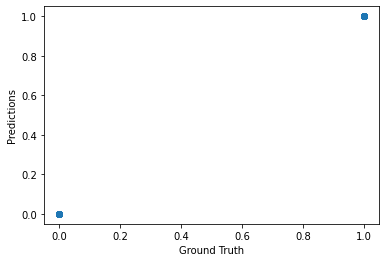

In [25]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

In [27]:
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

In [28]:
forest.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [29]:
importances = forest.feature_importances_

In [30]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [33]:
indices = np.argsort(importances)[::-1]

In [35]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 3 (0.099637)
2. feature 2 (0.067460)
3. feature 0 (0.066365)
4. feature 9 (0.050504)
5. feature 4 (0.047341)
6. feature 10 (0.046550)
7. feature 20 (0.046414)
8. feature 11 (0.045386)
9. feature 12 (0.044318)
10. feature 14 (0.044009)
11. feature 15 (0.043773)
12. feature 13 (0.043412)
13. feature 19 (0.043070)
14. feature 16 (0.042329)
15. feature 17 (0.041899)
16. feature 18 (0.041305)
17. feature 5 (0.036353)
18. feature 7 (0.031181)
19. feature 6 (0.031032)
20. feature 8 (0.028705)
21. feature 1 (0.023286)
22. feature 26 (0.008403)
23. feature 24 (0.007244)
24. feature 23 (0.006599)
25. feature 21 (0.005819)
26. feature 22 (0.005712)
27. feature 25 (0.001892)


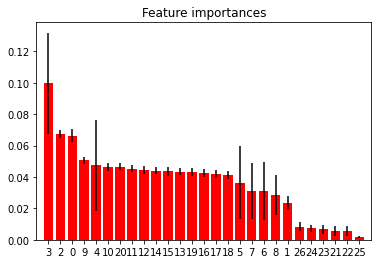

In [36]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color='r', yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()